In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/data_gathering/alternate/sample_mapping.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


## Evaluate a normalization method based on tightness of anchor gene distribution

#### Without normalization

In [2]:
df = pd.read_csv('/cellar/users/ramarty/Data/kir/components/tcga/kir_four_random_counts.agilent.good_coverage.csv',
           index_col=0)

In [3]:
df_reads = pd.read_csv('/cellar/users/ramarty/Data/kir/components/tcga/kir_four_random_read_counts.agilent.good_coverage.csv',
           index_col=0)

In [4]:
# population
len(df)

4717

In [5]:
# compare the all k-mers vs anchor gene

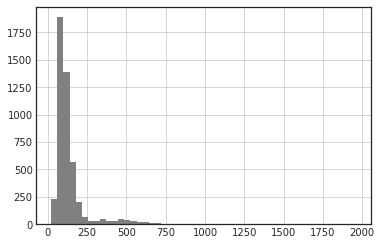

In [6]:
df[kmers[20]['KIR3DL3']].median(axis=1).hist(color='grey', bins=50)

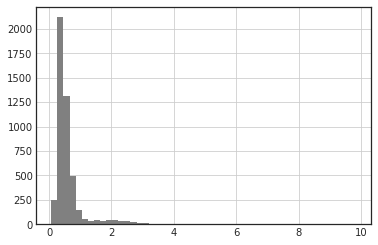

In [7]:
df_reads[kmers[20]['KIR3DL3']].mean(axis=1).hist(color='grey', bins=50)

In [8]:
plt.scatter(df[kmers[30]['KIR3DL3']].median(axis=1), df[random_genes].mean(axis=1))

NameError: name 'random_genes' is not defined

In [ ]:
df[kmers[20]['KIR3DL3']].median(axis=1).std() / df[kmers[20]['KIR3DL3']].median(axis=1).mean()

Conclusion: mean and median give about the same result -- maybe just stick with median because of outliers

#### With normalization

In [9]:
random_genes = [x.strip() for x in open('/cellar/users/ramarty/Data/kir/kmers/reference_genes/random_genes.100.txt').readlines()]
len(random_genes)

9936

In [10]:
random_gene_assignments = pickle.load(open('/cellar/users/ramarty/Data/kir/kmers/reference_genes/random_gene_assignments.p'))

In [11]:
anchor1 = df[kmers[20]['KIR3DL3']].mean(axis=1)

In [12]:
for r_gene in random_gene_assignments.keys():
    df[r_gene] = df[random_gene_assignments[r_gene]].sum(axis=1)
    df_reads[r_gene] = df_reads[random_gene_assignments[r_gene]].sum(axis=1)

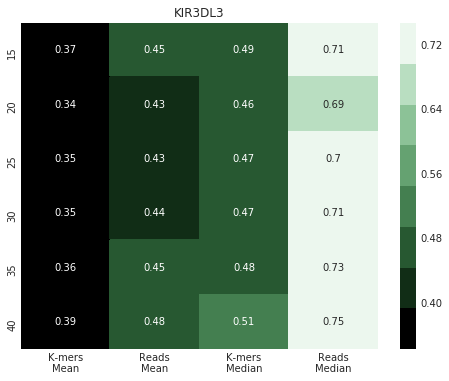

<Figure size 432x288 with 0 Axes>

In [13]:
anchor = 'KIR3DL3'
spread, length_used = [], []
for length in [15, 20, 25, 30, 35, 40]:
    length_spread = []
    length_used.append(length)
    #print length
    anchor1 = df[kmers[length][anchor]].sum(axis=1)
    
    # Assess different techniques
    
    # A - k-mers
    normalizer = df[random_genes].sum(axis=1)
    length_spread.append((anchor1 / normalizer).std() / (anchor1 / normalizer).mean())
    # B - reads
    normalizer = df_reads[random_genes].sum(axis=1)
    length_spread.append((anchor1 / normalizer).std() / (anchor1 / normalizer).mean())
    
    # C - must take median of the median of each gene
    normalizer = df[random_gene_assignments.keys()].median(axis=1)
    length_spread.append((anchor1 / normalizer).std() / (anchor1 / normalizer).mean())
    # D - reads
    normalizer = df_reads[random_gene_assignments.keys()].median(axis=1)
    length_spread.append((anchor1 / normalizer).std() / (anchor1 / normalizer).mean())
    
    # E - must take median of the median of each gene
    #normalizer = df[all_kir_kmers].mean(axis=1)
    #length_spread.append((anchor1 / normalizer).std() / (anchor1 / normalizer).mean())
    # F - reads
    #normalizer = df_reads[all_kir_kmers].mean(axis=1)
    #length_spread.append((anchor1 / normalizer).std() / (anchor1 / normalizer).mean())

    spread.append(length_spread)
    
fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(spread, annot=True, cmap=sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True),
           xticklabels=['K-mers\nMean', 'Reads\nMean', 'K-mers\nMedian', 'Reads\nMedian'],
            yticklabels=length_used)
plt.title(anchor)
plt.show()
plt.clf()

### Visualize KIR3DL3 

In [14]:
normalizer = df[random_genes].sum(axis=1)

(0, 0.2)

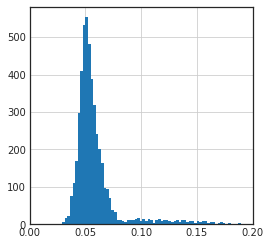

In [15]:
plt.figure(figsize=(4,4))
(anchor1 / normalizer).hist(bins=100)
plt.xlim(0, 0.2)

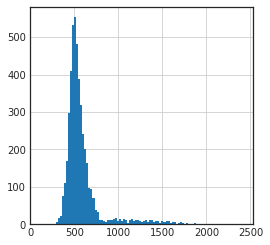

In [16]:
normalizer = df[random_genes].mean(axis=1)
plt.figure(figsize=(4,4))
(anchor1 / normalizer).hist(bins=100)

### Plot together

Text(0.5,1,'KIR3DL3')

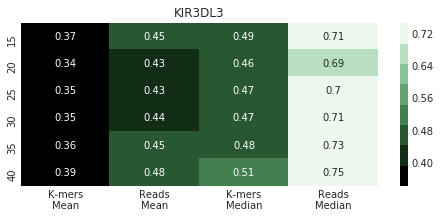

In [17]:
fig, ax = plt.subplots(figsize=(8,3)) 
sns.heatmap(spread, annot=True, cmap=sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True),
                      xticklabels=['K-mers\nMean', 'Reads\nMean', 'K-mers\nMedian',
                                   'Reads\nMedian'], yticklabels=length_used)
plt.title(anchor)

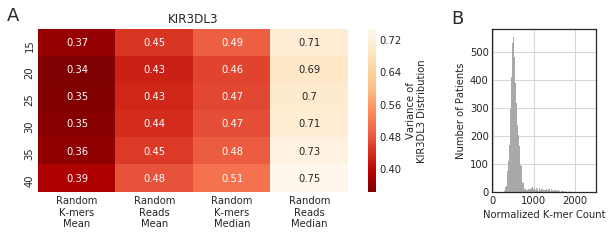

In [19]:
fig = plt.figure(figsize=(10, 3))
ax1 = plt.subplot2grid((1, 10), (0, 0), rowspan=1, colspan=7)
sns.heatmap(spread, annot=True, cmap='OrRd_r',
                      xticklabels=['Random\nK-mers\nMean', 'Random\nReads\nMean', 
                                   'Random\nK-mers\nMedian', 'Random\nReads\nMedian'], 
            yticklabels=length_used, cbar_kws={'label': 'Variance of\nKIR3DL3 Distribution'})
plt.title(anchor)
plt.text(-0.4, -0.3, 'A', size= 18)

ax2 = plt.subplot2grid((1, 10), (0, 8), rowspan=1, colspan=2)
(anchor1 / normalizer).hist(bins=100, color='darkgrey')
plt.ylabel("Number of Patients")
plt.xlabel("Normalized K-mer Count")
plt.text(-1000, 600, 'B', size= 18)
plt.savefig('/cellar/users/ramarty/Data/kir/manuscript_figures/figure_5.pdf', bbox_inches='tight')